## Imports

In [129]:
import os
import math

import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set()

In [130]:
# import mixtureofconcave as subm
# import determinantal as logsubm
# import plottingtools

## Plottingtools

In [131]:
#%% Plot gain curves

def objplot(objs, ground, setcolor, setcolorground=None):
    krange = np.arange(len(objs))
    
    plt.plot(krange, objs, "o", c=setcolor, label="f(S)")
    if setcolorground is not None:
        plt.plot(krange, [ground,]*len(objs), "--", c=setcolorground, label="ground set eval")
    plt.xlabel("set size")
    plt.legend(loc=2)

def logobjplot(objs, ground, setcolor, setcolorground=None):
    krange = np.arange(len(objs))
    
    plt.plot(krange, np.log(objs), "o", c=setcolor, label="log(f(S))")
    if setcolorground is not None:
        plt.plot(krange, [np.log(ground),]*len(objs), "--", c=setcolorground, label="ground set eval")
    plt.xlabel("set size")
    plt.legend(loc=2)


In [132]:
#%% Plot TSNE of subset selection

def viztsne(X, vcolor, S, setcolor, setlabel, perp):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        Plot the selection's 2d TSNE
    """
    
    [n,m] = X.shape
    
    Xemb = TSNE(n_components=2, random_state=256).fit_transform(X)
    
    plt.scatter(Xemb[:,0], Xemb[:,1], c=vcolor)
    plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
    plt.legend()

#%% Plot TSNE of subset selection -- with Discrete Memberships

def viztsne_DMQ(X, Memvec, memcolors, S, setcolor, setlabel, perp):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        An n x p Membership matrix for p groups
        Plot the selection's 2d TSNE
    """
    
    [n,m] = X.shape
    p = Memvec.shape[1]
    
    Xemb = TSNE(n_components=2, random_state=256).fit_transform(X)
    
    for jj in range(p):
        memgrp = np.argwhere(Memvec[:,jj])
        plt.scatter(Xemb[memgrp,0], Xemb[memgrp,1], c=memcolors[jj])
    plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
    plt.legend()

#%% Plot TSNE of subset selection -- with Intersecting Memberships

def viztsne_IMQ(X, Memvec, memcolors, S, setcolor, setlabel, perp):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        An n x p Membership matrix for p groups
        Plot the selection's 2d TSNE
    """
    
    [n,m] = X.shape
    p = Memvec.shape[1]
    
    Xemb = TSNE(n_components=2, random_state=256).fit_transform(X)
    
    plt.figure(figsize=(p*5, 5))
    for jj in range(p):
        plt.subplot(1,p,jj+1)
        plt.scatter(Xemb[:,0], Xemb[:,1], c=memcolors[0])
        
        memgrp = np.argwhere(Memvec[:,jj])
        plt.scatter(Xemb[memgrp,0], Xemb[memgrp,1], c=memcolors[1], label="group{}".format(jj+1))
        
        plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
        plt.legend()


In [133]:
#%% Plot PCA reduction of subset selection

def vizpca(X, vcolor, S, setcolor, setlabel="selection"):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        An n x p Membership matrix for p groups
        Plot the selection's 2d PCA
    """
    
    [n,m] = X.shape
    
    Xemb = PCA(n_components=m).fit(X).transform(X)[:,:2]
    
    plt.scatter(Xemb[:,0], Xemb[:,1], c=vcolor)
    plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
    plt.legend()

#%% Plot PCA reduction of subset selection -- with Discrete Memberships

def vizpca_DMQ(X, Memvec, memcolors, S, setcolor, setlabel="selection"):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        An n x p Membership matrix for p groups
        Plot the selection's 2d PCA
    """
    
    [n,m] = X.shape
    p = Memvec.shape[1]
    
    Xemb = PCA(n_components=m).fit(X).transform(X)[:,:2]
    
    for jj in range(p):
        memgrp = np.argwhere(Memvec[:,jj])
        plt.scatter(Xemb[memgrp,0], Xemb[memgrp,1], c=memcolors[jj])
    plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
    plt.legend()


In [134]:
#%% Plot TSNE of subset selection -- with Feature Quotas

#


In [169]:
#%% Plot Group Membership histograms of selections -- Membership Quota

def vizbalance_MQ(V, Memvec, vcolor, quo, quocolor, S, setcolor, setlabel="selection"):
    """ Given a ground set (n)
        With Membership Assignments (n x p)
        And optionally a quota
        A selection of indices S of size k < n
        Plot the selection's 2d PCA
    """
    
    [n,p] = Memvec.shape
    if V is None:
        V = np.arange(n)
    
    Vgroups = np.zeros(p)
    Sgroups = np.zeros(p)
    
    for jj in range(p):
        Vgroups[jj] = np.sum(Memvec[V,jj])
        Sgroups[jj] = np.sum(Memvec[S,jj])
    
    plt.bar(np.arange(p), Vgroups, color=vcolor)
    plt.bar(np.arange(p), Sgroups, color=setcolor, label=setlabel)
    plt.plot(np.arange(p), quo, marker="o", linestyle="--", c=quocolor)
    plt.legend()


---

## Log-submodular

### DPP

In [136]:
#%% Marginal gain oracle of the utility

def dppgains(K, AA, aa, detKA):
    """ Returns det(K_{A+a}) - det(K_A)
        BEING EXTREMELY CRUDE HERE,
        A more efficient way might be possible
    """
    
    Aa = np.append(AA,aa)
    KAa = np.atleast_2d(K[Aa])[:,Aa]
    
    return np.linalg.det(KAa) - detKA


In [159]:
#%% Plain old simple Greedy

def greedygains_logsubmod(V, X, k):
    """ For a given ground set, a feature matrix whose determinant defines the objective
        (THIS IS FOR A DPP),
        Returns the greedy selection and step-wise objective values
        Over the addition of k items
    """
    
    K = X @ X.transpose()
    n = K.shape[0]
    
    if V is None:
        V = np.arange(n)
    
    objs = np.empty(k+1)
    
    A = np.empty(0, int)
    ff = 1 # since this is a determinantal process and det(\phi) = 1
    objs[0] = ff
    
    for ii in range(k):
        
        maxgain = -100
        greedyv = np.random.choice(V)
        
        for vidx in range(len(V)):
            gain = dppgains(K, A, V[vidx], ff)
            if gain > maxgain:
                maxgain = gain
                greedyv = V[vidx]
        
        # add element to A, remove from V, update gains
        A = np.append(A, greedyv)
        V = V[V!=greedyv]
        ff += maxgain
        objs[ii+1] = ff
    
    return A, objs


### Run

In [138]:
n = 50
m = 200
k = 10

np.random.seed(0)
X = np.random.random((n, m))

K = X @ X.transpose()
ground = np.linalg.det(K)

In [139]:
S, objectives = greedygains_logsubmod(None, X, k)

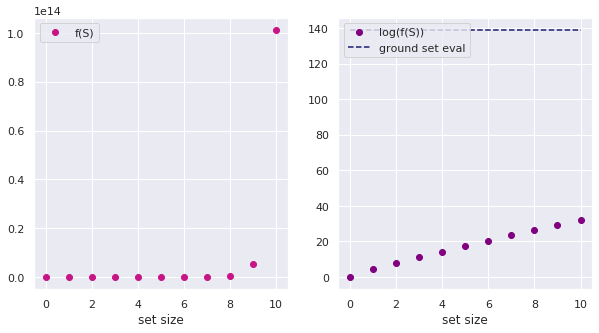

In [140]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
objplot(objectives, ground, "mediumvioletred")
plt.subplot(1,2,2)
logobjplot(objectives, ground, "purple", "midnightblue")

In [141]:
for oo in objectives: print("{:.3f}".format(oo))

1.000
74.940
2486.709
63555.810
1487750.070
31893574.032
677766067.108
14108951137.618
276220495859.501
5396136349373.081
101255403669399.172


---

## Submodular

### A weighted mixture of m(A)^{0.2}

In [142]:
#%% Marginal gain oracle of the utility

def submodgains(X, modA, fA, aa, mixw):
    """ Returns f(A+a) - f(A)
        Where f(A) = \sum_{j=1}^m (w_j * \phi(\sum_{i \in A} X_{ij}))
    """
    
    modAa = modA + X[aa,:] if aa is not None else modA
    
    # options: modA**0.5, np.log(1+modA), (1-np.exp(-modA)), modA/(1+modA)
    fAa = np.dot(mixw, modAa**0.2)
    
    return fAa - fA


In [143]:
#%% Plain old simple Greedy

def greedygains_submod(V, X, mixw, k):
    """ For a given ground set, a feature matrix and mixture weights which define the objective
        (submodular),
        Returns the greedy selection and step-wise objective values
        Over the addition of k items
    """
    
    [n,m] = X.shape
    
    if V is None:
        V = np.arange(n)
    
    objs = np.empty(k+1)
    
    A = np.empty(0, int)
    modA = np.sum(X[A,:], axis=0)
    ff = 0 # assume normalized for now
    objs[0] = ff
    
    for ii in range(k):
        
        maxgain = -100
        greedyv = np.random.choice(V)
        
        for vidx in range(len(V)):
            gain = submodgains(X, modA, ff, V[vidx], mixw)
            if gain > maxgain:
                maxgain = gain
                greedyv = V[vidx]
        
        # add element to A, remove from V, update gains
        A = np.append(A, greedyv)
        modA += X[greedyv,:]
        V = V[V!=greedyv]
        ff += maxgain
        objs[ii+1] = ff
    
    return A, objs


In [224]:
#%% Greedy for DMQ

def greedyquota_submod(V, X, mixw, Memvec, quo, k ,verbose=False):
    """ For the disjoint membership quota.
        Memvec is an n x p one-hot matrix (exactly one 1 per row).
        quo is a p x 1 vector.
        Output a subset that satisfies the quotas.
    """
    
    [n,m] = X.shape
    p = Memvec.shape[1]
    
    if V is None:
        V = np.arange(n)
    
    objs = np.empty(k+1)
    
    A = np.empty(0, int)
    modA = np.sum(X[A,:], axis=0)
    ff = 0 # assume normalized for now
    objs[0] = ff
    
    """ Quota-filling stage """
    
    ii = 0
    Vsat = np.copy(V) # only for use in the quota-filling stage
    
    # remove from Vsat groups with zero quota
    for grp in range(p):
        if quo[grp] < 1:
            Vsat = np.delete(Vsat, np.argwhere(Memvec[Vsat,grp].flatten()))
    
    while ii < np.sum(quo):
        
        maxgain = -100
        greedyv = np.random.choice(Vsat)
        
        for vidx in range(len(Vsat)):
            gain = submodgains(X, modA, ff, Vsat[vidx], mixw)
            if gain > maxgain:
                maxgain = gain
                greedyv = Vsat[vidx]
        
        # add element to A, update gains
        A = np.append(A, greedyv)
        modA += X[greedyv,:]
        ff += maxgain
        objs[ii+1] = ff
        
        # remove from V, remove all from Vsat if quota filled
        V = V[V!=greedyv]
        grp = np.argwhere(Memvec[greedyv])

        if verbose:
            print("selected element", greedyv)
            print("lies in group", grp)
            #print("new A", A)

        if np.sum(Memvec[A,grp]) >= quo[grp]:
            if verbose:
                print("\n Quota for group {} satisfied by set {} \n".format(
                        grp, A[Memvec[A,grp].flatten().astype(bool)])
                     )
                print("Deleting {}".format(Vsat[Memvec[Vsat,grp].flatten().astype(bool)]))
            Vsat = np.delete(Vsat, np.argwhere(Memvec[Vsat,grp].flatten()))
        else:
            if verbose:
                print("Only deleting", Vsat[Vsat==greedyv])
            Vsat = Vsat[Vsat!=greedyv]
        
        ii += 1
        
    if verbose:
        print("Quotas filled.")
        print("quotas : ", quo)
        print("Representatives : ", [np.sum(Memvec[A,jj]) for jj in range(p)])
    
    
    """ Regular greedy stage """
    
    while ii < k:
        
        maxgain = -100
        greedyv = np.random.choice(V)
        
        for vidx in range(len(V)):
            gain = submodgains(X, modA, ff, V[vidx], mixw)
            if gain > maxgain:
                maxgain = gain
                greedyv = V[vidx]
        
        # add element to A, remove from V, update gains
        A = np.append(A, greedyv)
        modA += X[greedyv,:]
        V = V[V!=greedyv]
        ff += maxgain
        objs[ii+1] = ff
        
        if verbose:
            print("selected element", greedyv)
            print("lies in group", np.argwhere(Memvec[greedyv]))
            #print("new A", A)
        
        ii += 1
    
    return A, objs


### Run

In [145]:
n = 50
m = 200
k = 10

np.random.seed(0)
X = np.random.random((n, m))
mixw = np.random.random(m); mixw = mixw/np.max(mixw)

ground = np.dot(mixw, np.sum(X, axis=0)**0.2)

In [146]:
S, objectives = greedygains_submod(None, X, mixw, k)

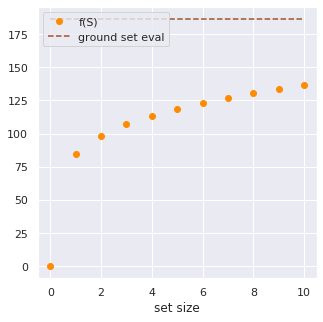

In [149]:
plt.figure(figsize=(5,5))
objplot(objectives, ground, "darkorange", "sienna")

In [148]:
for oo in objectives: print("{:.3f}".format(oo))

0.000
84.346
98.494
107.093
113.569
118.826
123.244
127.106
130.542
133.648
136.481


---

## DPP v/s Submodular

In [ ]:
n = 500
m = 72
k = 25

np.random.seed(0)
X = np.random.random((n, m))

np.random.seed(1)
mixw = np.random.random(m); mixw = mixw/np.max(mixw)

In [ ]:
S_d, objectives_d = greedygains_logsubmod(None, X, k)

In [ ]:
S_s, objectives_s = greedygains_submod(None, X, mixw, k)

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
viztsne(X, S_d, "purple", "DPP", 30)
plt.subplot(1,2,2)
viztsne(X, S_s, "seagreen", "SPP", 30)

---

## Greedy v/s WeightedGreedy

Compare:<br>
Feasibility, output quality, computational complexity.

---

<p style="background-color:#ff9933">
Constrained Submodular Max with Discrete Membership Quota
</p>

colors -- #ccff66 #ff99cc #ff9933

Things to look out for:<br>
1. More number of groups <--> more constraint on maximizing w.r.t. one group
2. Having the groups correlating with features <--> making some group sinherently _better_ <--> making the quotas output worser solutions maybe.
3. Try with the _learnt_ ILMSF weights.. that way you have a "true" submodular mixture utility. You could also use true labels!!
4. Alternatively, "assign" groups via clustering.

In [207]:
n_samples = 400
m_features = 20
k_budget = 60

np.random.seed(0)
X = np.random.random((n_samples, m_features))

np.random.seed(1)
mixw = np.random.random(m_features); mixw = mixw/np.max(mixw)

In [208]:
p_groups = 10
memcolors = np.array(["#11{:02X}dd".format(pp) for pp in np.arange(0, 256, 256//p_groups)])

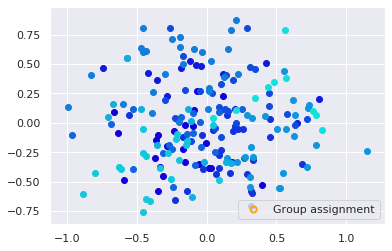

In [209]:
#%% Random group assignment

# np.random.seed(2)
# Memvec = np.eye(p_groups)[np.random.choice(p_groups, n_samples)].astype(int)

# print([len(np.argwhere(Memvec[:,jj])) for jj in range(p_groups)])

#%%Clustering-based group assignment

kmeans = KMeans(n_clusters=p_groups, random_state=0).fit(X)
Memvec = np.eye(p_groups)[kmeans.labels_].astype(int)

vizpca_DMQ(X, Memvec, memcolors, [], "orange", "Group assignment")

In [210]:
#%% Uniform quota

# quo = np.ones(p_groups)*2

#%% Proportionate quota

quo = np.sum(Memvec, axis=0)*k_budget//n_samples - 3

Objective without quota 17.054966027560297 
 [133 127  97  13  59   7 183   0  99  23  76 163   1  77  18 108  72  54
 166 112  73 189  94 169  79 154 142  89  75 198 187 109 171   5 121 146
  65 134  44 107 157 156  63 178 114  36 125  88  29 144  68  80  21  49
 182  90  62 155  22 130]
Objective with quota 17.05473306029227 
 [133 127  97  13  59   7 183   0  99  23  76 163   1  77  18 108  54 112
  73  94  75 171  63  36  88  28 166  72 189  79 154 169  89 142 198 109
 187 146   5 121 134  65 107  44 156 157 178 114 125  29  68 144  80  21
  49 182  90 155  62  22]
Objective of random selection 16.52630530731549 
 [ 92 191 180 105 162  77 165 182   4  43 139  29  76 160 178 179 170 151
 115 125  89  43 114 115 104  88  95  28  64 114  58  88 127  51 150  10
 107  31   9 103 134 158  67 146 140  73  74  91 193  53 170 134 137 164
 187   8 181  18 106  21]


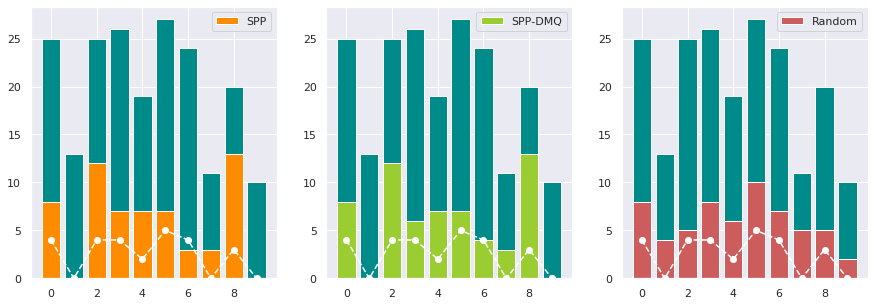

In [225]:
S_s, objectives_s = greedygains_submod(None, X, mixw, k_budget)
S_sq, objectives_sq = greedyquota_submod(None, X, mixw, Memvec, quo, k_budget)
S_r = np.random.choice(n_samples, k_budget)
objective_sr = submodgains(X, np.sum(X[S_r,:], axis=0), 0, None, mixw)

print("Objective without quota", objectives_s[-1], "\n", S_s)
print("Objective with quota", objectives_sq[-1], "\n", S_sq)
print("Objective of random selection", objective_sr, "\n", S_r)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
vizbalance_MQ(np.arange(n_samples), Memvec, "darkcyan", quo, "white", S_s, "darkorange", "SPP")
plt.subplot(1,3,2)
vizbalance_MQ(np.arange(n_samples), Memvec, "darkcyan", quo, "white", S_sq, "yellowgreen", "SPP-DMQ")
plt.subplot(1,3,3)
vizbalance_MQ(np.arange(n_samples), Memvec, "darkcyan", quo, "white", S_r, "indianred", "Random")

= = = = 

Can we show that there is some benefit to adding _good_ elements _after_ we have met
fairness (here, diversity?! if they are geometrically correlated...) constraints.

We don't want to confuse _good_ with _diverse_. I mean we do want to pick the good ones among the diverse tho...<br>
Is it like -- the group that is picked last gets more quality canditades chosen? and the one that goes first gets filled with token shit??

= = = = 

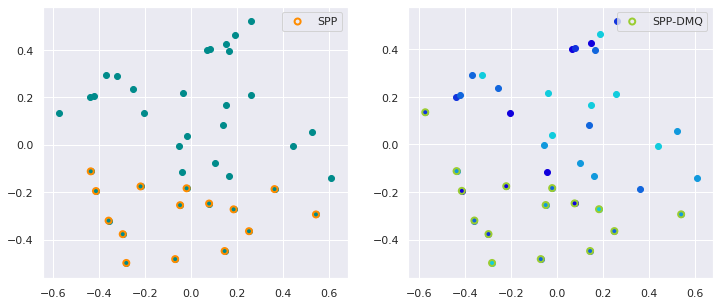

In [156]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
vizpca(X, "darkcyan", S_s, "darkorange", "SPP")
plt.subplot(1,2,2)
vizpca_DMQ(X, Memvec, memcolors, S_sq, "yellowgreen", "SPP-DMQ")

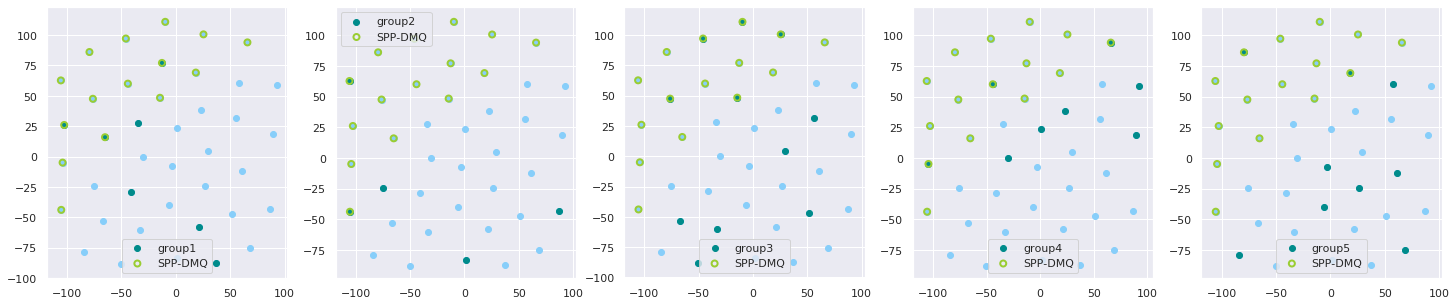

In [153]:
viztsne_IMQ(X, Memvec, ["lightskyblue", "darkcyan"], S_sq, "yellowgreen", "SPP-DMQ", 30)

---

In [ ]:
print(objectives_s)
print(objectives_sq)

In [ ]:
def viztsne_IMQ(X, Memvec, memcolors, figrows, S, setcolor, setlabel, perp):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        An n x p Membership matrix for p groups
        Plot the selection's 2d TSNE
    """
    
    [n,m] = X.shape
    p = Memvec.shape[1]
    
    Xemb = TSNE(n_components=2, random_state=256).fit_transform(X)
    
    plt.figure(figsize=((p//figrows+1)*5, figrows*5))
    for jj in range(p):
        plt.subplot(figrows,p//figrows+1,jj+1)
        plt.scatter(Xemb[:,0], Xemb[:,1], c=memcolors[0])
        
        memgrp = np.argwhere(Memvec[:,jj])
        plt.scatter(Xemb[memgrp,0], Xemb[memgrp,1], c=memcolors[1], label="group{}".format(jj+1))
        
        plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
        plt.legend()